In [219]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import copy

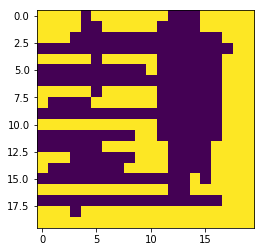

In [270]:
def create_map(w,l,walls):
    _map=np.zeros((w,l))
    for i in range(walls):
        XorY=rnd.randint(1,2)
        wlenght=rnd.randint(2,w-3)
        pXOY=rnd.randint(2,w-2)
        r=rnd.randint(0,3)
        if(XorY==1):
            for l in range(r,wlenght):
                _map[pXOY][l]=-2
        else:
            for l in range(r,wlenght):
                _map[l][pXOY]=-2        
    plt.imshow(_map)
    return _map

_MAP=create_map(20,20,35)




In [271]:

def bomb_n_horse(MAP,Px,Py,Hx,Hy):
    Mx=My=len(MAP)
    x0=[1,2,-1,-2,1,2,-1,-2]
    y0=[2,1,-2,-1,-2,-1,2,1]
    M2 = np.zeros((len(MAP),len(MAP)))
    M1 = np.zeros((len(MAP),len(MAP)))
    M0 = np.zeros((len(MAP),len(MAP)))
    M=[M0,M1,M2]
    M[0][Hx][Hy]=1
    M[1][Hx][Hy]=1
    M[2][Hx][Hy]=1
    for k in range(0,3):
        for step in range(1,Mx*My): 
            if(M[k][Px][Py]!=0):
                break
            for x in range(len(MAP)):
                for y in range(len(MAP)):
                    if (M[k][x][y]==step): 
                        for i in range(8):      
                            if (x+x0[i]>=0)&(y+y0[i]>=0)&(x+x0[i]<Mx)&(y+y0[i]<My): 
                                if(M[k][x+x0[i]][y+y0[i]]==0):
                                    if(MAP[x+x0[i]][y+y0[i]]==0):
                                        M[k][x+x0[i]][y+y0[i]]=step+1
                                    if(MAP[x+x0[i]][y+y0[i]]==-2): 
                                        M[k][x+x0[i]][y+y0[i]]=-9
                                        if(k==0):
                                            M[k+1][x+x0[i]][y+y0[i]]=step+1
                                            M[k+2][x+x0[i]][y+y0[i]]=step+1
                                        if(k==1):
                                            M[k+1][x+x0[i]][y+y0[i]]=step+1
    MAPcpy=np.zeros((len(MAP),len(MAP)))
    MAPcpy=copy.copy(MAP)
    MAPcpy[Hx,Hy]=1
    MAPcpy[Px,Py]=1
    print(":::::::::::::::MAP::::::::::::::::::")
    print(MAPcpy)
    print("::::::::::::::ZERO:::::::::::::::::::")
    print(M[0])
    print("::::::::::::::ONE:::::::::::::::::::")
    print(M[1])
    print("::::::::::::::TWO:::::::::::::::::::")
    print(M[2])
    for i in range(0,3):
        if(M[i][Px][Py]<=0):
            print("Horse cannot reach the food using  ",i," bomb(s) :(")
        else:
            print("Did u know that using  ",i," bomb(s) horse need only", M[i][Px][Py]," moves to reach the food!!!")
    return

bomb_n_horse(_MAP,17,19,0,0)    

:::::::::::::::MAP::::::::::::::::::
[[ 1.  0.  0.  0. -2.  0.  0.  0.  0.  0.  0.  0. -2. -2. -2.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0. -2. -2.  0.  0.  0.  0.  0. -2. -2. -2. -2.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.  0.
   0.  0.]
 [-2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.
   0.  0.]
 [ 0.  0.  0.  0.  0. -2.  0.  0.  0.  0.  0. -2. -2. -2. -2. -2. -2.  0.
   0.  0.]
 [-2. -2. -2. -2. -2. -2. -2. -2. -2. -2.  0. -2. -2. -2. -2. -2. -2.  0.
   0.  0.]
 [-2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0. -2.  0.  0.  0.  0.  0. -2. -2. -2. -2. -2. -2.  0.
   0.  0.]
 [ 0. -2. -2. -2. -2.  0.  0.  0.  0.  0.  0. -2. -2. -2. -2. -2. -2.  0.
   0.  0.]
 [-2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2. -2.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -2. -2. -2. -2. -2. -2.  0.
   0.  0.]
 [-2. -2. -2. -2. -2. -2. -2